In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [3]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('injury_data_updated copy.csv')
print(df.head())

   Unnamed: 0  Season Year  Week Team Name Team City          Player  \
0           0       2023.0   1.0   Cowboys    Dallas   Jourdan Lewis   
1           1       2023.0   1.0   Cowboys    Dallas     Tyler Smith   
2           2       2023.0   1.0   Cowboys    Dallas    Sam Williams   
3           3       2023.0   1.0   Cowboys    Dallas  Donovan Wilson   
4           4       2023.0   1.0   Cowboys    Dallas    Malik Hooker   

   Player Jersey Position Injury Status         Injury Status Date  \
0            2.0       CB           NaN  2023-09-08T00:00:00+00:00   
1           73.0       OL      Doubtful  2023-09-08T00:00:00+00:00   
2           54.0       DE  Questionable  2023-09-08T00:00:00+00:00   
3            6.0      SAF      Doubtful  2023-09-08T00:00:00+00:00   
4           28.0      SAF  Questionable  2023-09-09T00:00:00+00:00   

                   Practice Status Injury Type  
0   Full Participation In Practice        Foot  
1  Did Not Participate In Practice   Hamstring  

In [4]:
# Display the first few rows of the dataset to understand its structure
injury_counts = df.groupby('Position')['Injury Type'].count()
print(injury_counts)

Position
C       56
CB     370
DB      93
DE     113
DL     132
DT     134
FB      20
FS       2
G      110
K       15
LB     325
LS       2
MLB      7
NT       5
OL     205
OLB     97
P       16
QB     102
RB     228
SAF    241
SS      10
T      254
TE     190
WR     423
Name: Injury Type, dtype: int64


In [5]:
# Identify the position with the highest number of injuries
highest_injuries_position = injury_counts.idxmax()
highest_injuries_count = injury_counts.max()
print(f"Position with the highest injuries: {highest_injuries_position} ({highest_injuries_count} injuries)")

Position with the highest injuries: WR (423 injuries)


In [6]:
lowest_injuries_position = injury_counts.idxmin()
lowest_injuries_count = injury_counts.min()
print(f"Position with the lowest injuries: {lowest_injuries_position} ({lowest_injuries_count} injuries)")

Position with the lowest injuries: FS (2 injuries)


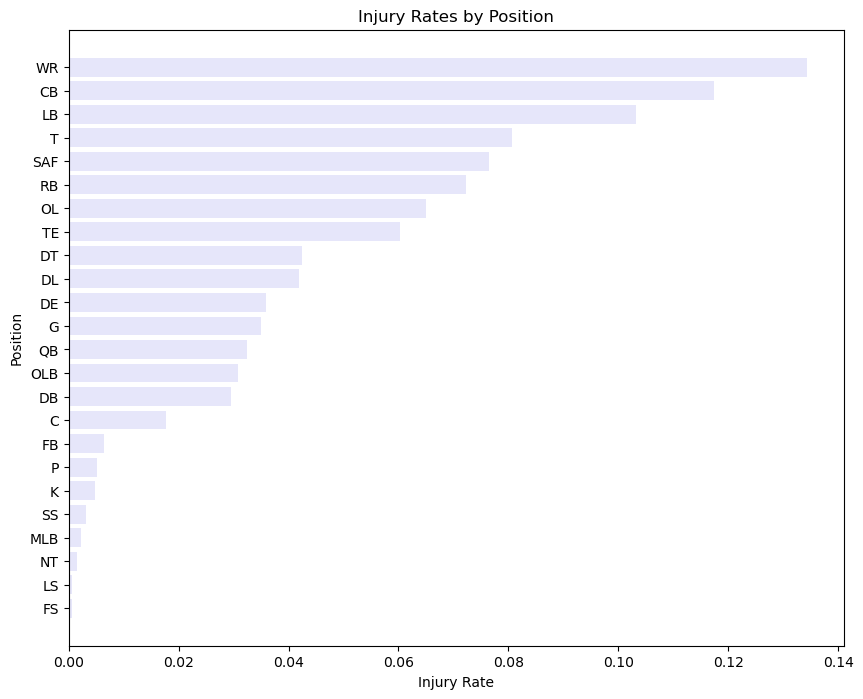

In [7]:
# Group by Position and count occurrences of Injury Type
injury_counts = df.groupby('Position')['Injury Type'].count().reset_index()
injury_counts.rename(columns={'Injury Type': 'Injury Count'}, inplace=True)

# # Calculate injury rates per position
total_injuries = injury_counts['Injury Count'].sum()
injury_counts['Injury Rate'] = injury_counts['Injury Count'] / total_injuries

# Sort by Injury Rate 
injury_counts.sort_values('Injury Rate', ascending=False, inplace=True)

# Create a Bar Chart
plt.figure(figsize=(10, 8))
plt.barh(injury_counts['Position'], injury_counts['Injury Rate'], color='lavender')
plt.xlabel('Injury Rate')
plt.ylabel('Position') 
plt.title('Injury Rates by Position')
plt.gca().invert_yaxis()  
plt.show()

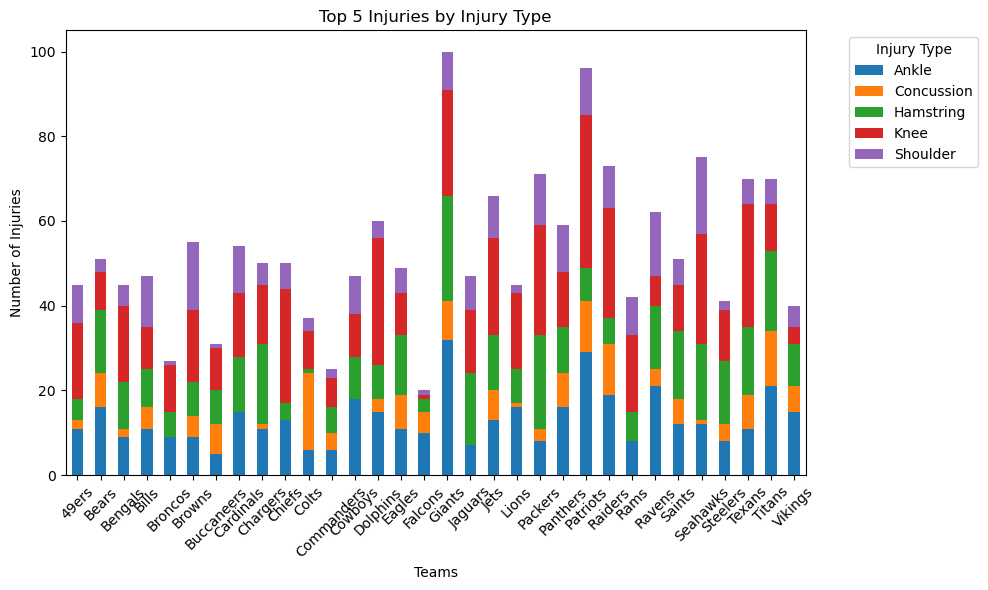

In [8]:
# Calculate counts of each injury type across all teams
injury_counts = df['Injury Type'].value_counts()

# Select top 5 injuries by count
top_5_injuries = injury_counts.head(5)

# Filter the original dataframe to include only these top 5 injury types
df_filtered = df[df['Injury Type'].isin(top_5_injuries.index)]

# Calculate counts of each injury type per team
injury_counts_per_team = df_filtered.groupby(['Team Name', 'Injury Type']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
injury_counts_per_team.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Teams')
plt.ylabel('Number of Injuries')
plt.title('Top 5 Injuries by Injury Type')
plt.xticks(rotation=45)
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

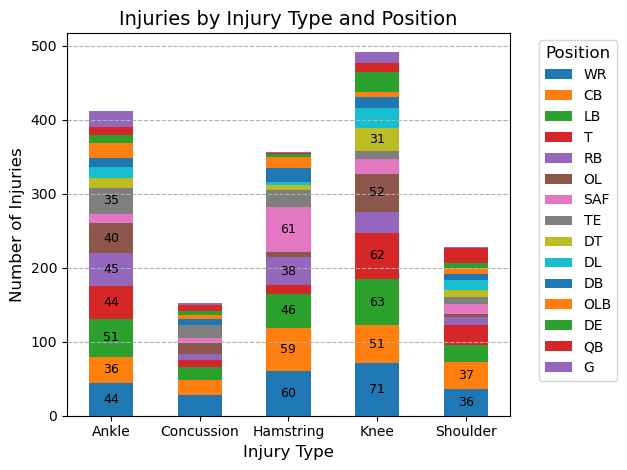

In [9]:
# Group by Injury Type and Position, then count injuries
injuries_by_position = df_filtered.groupby(['Injury Type', 'Position']).size().unstack(fill_value=0)

# Calculate total injuries per position
total_injuries_per_position = injuries_by_position.sum()

# Filter positions with over 30 injuries
positions_to_show = total_injuries_per_position[total_injuries_per_position > 30].index

# Filter injuries_by_position to include only these positions
injuries_by_position = injuries_by_position[positions_to_show]

# Calculate total injuries per position and sort
total_injuries_per_position = injuries_by_position.sum().sort_values(ascending=False)

# Sort injuries_by_position based on the sorted positions
injuries_by_position = injuries_by_position[total_injuries_per_position.index]

# Plotting a stacked bar chart
plt.figure(figsize=(12, 8))

# Using tab10 colormap from matplotlib.cm
colors = cm.tab10.colors[:len(injuries_by_position.columns)]

ax = injuries_by_position.plot(kind='bar', stacked=True, color=colors)

# Adding labels, title, and formatting
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.title('Injuries by Injury Type and Position', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Position', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')

# Adding labels to each bar only for values greater than 30
for idx, col in enumerate(injuries_by_position.columns):
    for bar in ax.patches[idx * len(injuries_by_position) : (idx + 1) * len(injuries_by_position)]:
        width, height = bar.get_width(), bar.get_height()
        x, y = bar.get_xy() 
        if height > 30:  # Only annotate positions with more than 30 injuries
            ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [12]:
Analysis: Injury rate per position provides insights into the risks associated with different roles within a team. We will be able to guide decisions aimed at improving player safety, performance, and overall team success. 
Wide Receiver running in high-speed collisions and tackles, leading to various injuries including concussions, hamstring, knee, shoulder and ankle.
Next Steps:Find ways to eleviate some of the stress on the areas they are facing (ie rotating wr, cb and lb), concussion, ankle, hamstring knee adnd shoulder are the top 5 injury types across

SyntaxError: invalid syntax (1889843754.py, line 1)